C:\Users\A\Anaconda4\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [19]:
df2=dt.DataReader(['^GSPC'], 'yahoo', start='01/01/2018', end='01/01/2020')
df2=df2[['Close']]

df3=dt.DataReader(['LMT'], 'yahoo', start='01/01/2018', end='01/01/2020')
df3=df3[['Close']]

df4=dt.DataReader(['GOLD'], 'yahoo', start='01/01/2018', end='01/01/2020')
df4=df4[['Close']]




In [20]:
df2['PCT change SPX']=df2.pct_change()
df3['PCT change LMT']=df3.pct_change()
df4['PCT change GOLD']=df4.pct_change()
df2['PCT change SPX sum']=df2[['PCT change SPX']].cumsum()+1
df3['PCT change LMT sum']=df3[['PCT change LMT']].cumsum()+1
df4['PCT change GOLD sum']=df4[['PCT change GOLD']].cumsum()+1






In [21]:
df=df2.join(df3, how='inner')
df=df.join(df4,how='inner')
df

Attributes,Close,PCT change SPX,PCT change SPX sum,Close,PCT change LMT,PCT change LMT sum,Close,PCT change GOLD,PCT change GOLD sum
Symbols,^GSPC,,,LMT,,,GOLD,,
Date,,,,,,,,,
2018-01-02,2695.810059,NaN,NaN,318.540009,NaN,NaN,15.200000,NaN,NaN
2018-01-03,2713.060059,0.006399,1.006399,321.209991,0.008382,1.008382,15.000000,-0.013158,0.986842
2018-01-04,2723.989990,0.004029,1.010427,326.720001,0.017154,1.025536,15.030000,0.002000,0.988842
2018-01-05,2743.149902,0.007034,1.017461,329.679993,0.009060,1.034596,14.950000,-0.005323,0.983519
2018-01-08,2747.709961,0.001662,1.019124,328.160004,-0.004610,1.029985,14.740000,-0.014047,0.969473
...,...,...,...,...,...,...,...,...,...
2019-12-24,3223.379883,-0.000195,1.201036,390.170013,-0.004414,1.245402,18.309999,0.030968,1.282655
2019-12-26,3239.909912,0.005128,1.206164,392.299988,0.005459,1.250861,18.360001,0.002731,1.285386


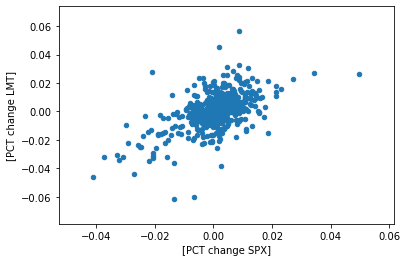

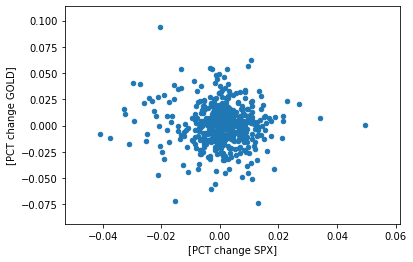

In [25]:
#plot scatter plot
df.plot(kind='scatter', x=['PCT change SPX'],  y=['PCT change LMT'])
plt.show()

df.plot(kind='scatter', x=['PCT change SPX'],  y=['PCT change GOLD'])
plt.show()

beta_LMT= 0.7757813483735639      alpha_LMT= 0.00017063688046871863
beta_GOLD= -0.09832980454035892      alpha_GOLD= 0.0006333014871303014


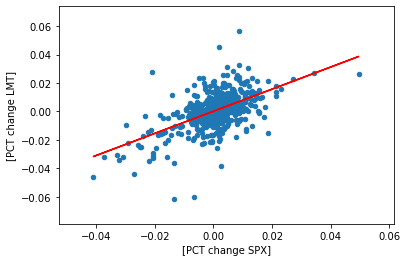

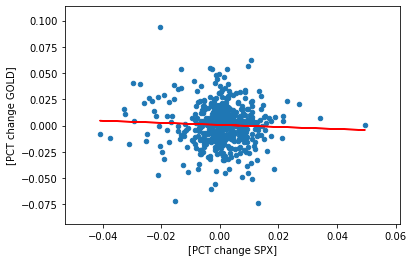

In [51]:
#generate best fit line

d_R1=df2['PCT change SPX']
d_R1=d_R1.dropna()
d_R2=df3['PCT change LMT']
d_R2=d_R2.dropna()
d_R3=df4['PCT change GOLD']
d_R3=d_R3.dropna()

d_R1

#gradient and intercept calculation
beta_LMT,alpha_LMT=np.polyfit(d_R1,d_R2,1)
print('beta_LMT= {}      alpha_LMT= {}'.format(beta_LMT,alpha_LMT))

beta_GOLD,alpha_GOLD=np.polyfit(d_R1,d_R3,1)
print('beta_GOLD= {}      alpha_GOLD= {}'.format(beta_GOLD,alpha_GOLD))

#plot best fit line 

df.plot(kind='scatter', x=['PCT change SPX'],  y=['PCT change LMT'])
plt.plot(d_R1, beta_LMT*d_R1 + alpha_LMT, '-', color='r')
plt.show()

df.plot(kind='scatter', x=['PCT change SPX'],  y=['PCT change GOLD'])
plt.plot(d_R1, beta_GOLD*d_R1 + alpha_GOLD, '-', color='r')
plt.show()

#beta is the gradient hence it indicates how a stock trend in comparison 
#the market(SPX)
#==> a beta of 2 means the stock makes 4x for every 2x of the market

#alpha is y intercept, the higher the alpha the more returns it makes
#on average 




In [63]:

#create dataframe for all


d_r_cumsum1=df2['PCT change SPX sum']
d_r_cumsum1=d_r_cumsum1.dropna()
d_r_cumsum1=pd.DataFrame(d_r_cumsum1)
d_r_cumsum2=df3['PCT change LMT sum']
d_r_cumsum2=d_r_cumsum2.dropna()
d_r_cumsum2=pd.DataFrame(d_r_cumsum2)
d_r_cumsum3=df4['PCT change GOLD sum']
d_r_cumsum3=d_r_cumsum3.dropna()
d_r_cumsum3=pd.DataFrame(d_r_cumsum3)

d_r_cumsum4=d_r_cumsum1.join(d_r_cumsum2, how='inner')
d_r_cumsum=d_r_cumsum4.join(d_r_cumsum3, how='inner')

d_r_cumsum.corr()


,PCT change SPX sum,PCT change LMT sum,PCT change GOLD sum
PCT change SPX sum,1.000000,0.805161,0.614930
PCT change LMT sum,0.805161,1.000000,0.685856
PCT change GOLD sum,0.614930,0.685856,1.000000


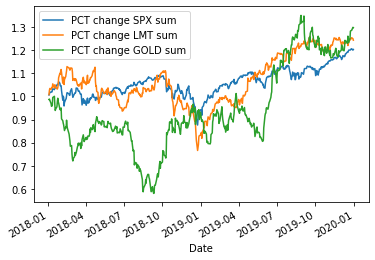

In [62]:
d_r_cumsum.plot()
plt.show()